# Exploring Hackers New Post

In this project, we'll compare two different types of posts from Hacker News, a popular site where technology related stories (or 'posts') are voted and commented upon. The two types of posts we'll explore begin with either Ask HN or Show HN.

Users submit Ask HN posts to ask the Hacker News community a specific question, such as "What is the best online course you've ever taken?" Likewise, users submit Show HN posts to show the Hacker News community a project, product, or just generally something interesting.

We'll specifically compare these two types of posts to determine the following:

1. Do Ask HN or Show HN receive more comments on average?
2. Do posts created at a certain time receive more comments on average?

It should be noted that the data set we're working with was reduced from almost 300,000 rows to approximately 20,000 rows by removing all submissions that did not receive any comments, and then randomly sampling from the remaining submissions.

## Introduction

First, we'll read in the data and set an index.

In [1]:
#to disable warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
file=pd.read_csv('hacker_news.csv',index_col='id') #sets 'id' column as index
file.head()

,title,url,num_points,num_comments,author,created_at
id,,,,,,
12224879,Interactive Dynamic Video,http://www.interactivedynamicvideo.com/,386,52,ne0phyte,8/4/2016 11:52
10975351,How to Use Open Source and Shut the Fuck Up at...,http://hueniverse.com/2016/01/26/how-to-use-op...,39,10,josep2,1/26/2016 19:30
11964716,Florida DJs May Face Felony for April Fools' W...,http://www.thewire.com/entertainment/2013/04/f...,2,1,vezycash,6/23/2016 22:20
11919867,Technology ventures: From Idea to Enterprise,https://www.amazon.com/Technology-Ventures-Ent...,3,1,hswarna,6/17/2016 0:01
10301696,Note by Note: The Making of Steinway L1037 (2007),http://www.nytimes.com/2007/11/07/movies/07ste...,8,2,walterbell,9/30/2015 4:12


In the above tabe, the date of creation i.e. 'created_at' column is in string format. Let's convert it into datetime object.

In [3]:
file['created_at']=pd.to_datetime(file['created_at'])

## Extracting Ask HN and Show HN Posts

First, we'll identify posts that begin with either Ask HN or Show HN and separate the data for those two types of posts into different datasets.Separating the data makes it easier to analyze .

In [4]:
#Separating ask hn posts 
ask=file['title'].str.lower().str.startswith('ask hn')
ask_posts=file[ask] #contains dataset having only ask hn posts

#Separating show hn post
show=file['title'].str.lower().str.startswith('show hn')
show_posts=file[show] #contains dataset having only ask hn posts

In [5]:
ask_posts.head()

,title,url,num_points,num_comments,author,created_at
id,,,,,,
12296411,Ask HN: How to improve my personal website?,NaN,2,6,ahmedbaracat,2016-08-16 09:55:00
10610020,Ask HN: Am I the only one outraged by Twitter ...,NaN,28,29,tkfx,2015-11-22 13:43:00
11610310,Ask HN: Aby recent changes to CSS that broke m...,NaN,1,1,polskibus,2016-05-02 10:14:00
12210105,Ask HN: Looking for Employee #3 How do I do it?,NaN,1,3,sph130,2016-08-02 14:20:00
10394168,Ask HN: Someone offered to buy my browser exte...,NaN,28,17,roykolak,2015-10-15 16:38:00


## Calculating the Average Number of Comments for Ask HN and Show HN Posts

Now that we separated ask posts and show posts into different datasets, we'll calculate the average number of comments each type of post receives.

In [6]:
#Displays average number of comments ask post receives
display(ask_posts.num_comments.mean())

#Displays average number of comments show post receives
show_posts.num_comments.mean()

14.038417431192661

10.31669535283993

On average, ask posts in our sample receive approximately 14 comments, whereas show posts receive approximately 10. Since ask posts are more likely to receive comments, we'll focus our remaining analysis just on these posts.

## Calculating the Average Number of Comments for Ask HN Posts by Hour

First,we'll format the date and time into hour format. 

In [7]:
ask_posts.loc[:,'created_at']=ask_posts.created_at.dt.strftime('%H') #formatting date into hour 
ask_posts.head()

,title,url,num_points,num_comments,author,created_at
id,,,,,,
12296411,Ask HN: How to improve my personal website?,NaN,2,6,ahmedbaracat,09
10610020,Ask HN: Am I the only one outraged by Twitter ...,NaN,28,29,tkfx,13
11610310,Ask HN: Aby recent changes to CSS that broke m...,NaN,1,1,polskibus,10
12210105,Ask HN: Looking for Employee #3 How do I do it?,NaN,1,3,sph130,14
10394168,Ask HN: Someone offered to buy my browser exte...,NaN,28,17,roykolak,16


We can see that the 'created_at' column is transfromed into hour. Now we will calcualte the average number of comments an ask posts recives by hours and plot it in graph.

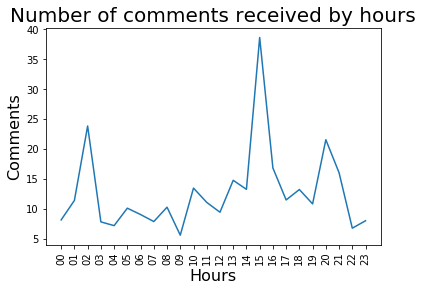

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(ask_posts.groupby('created_at').num_comments.mean())
plt.xticks(rotation=90)
plt.title('Number of comments received by hours',fontsize=20)
plt.xlabel('Hours',fontsize=16)
plt.ylabel('Comments',fontsize=16)
plt.show()

## Conclusion

In this project, we analyzed ask posts and show posts to determine which type of post and time receive the most comments on average. Based on our analysis, to maximize the amount of comments a post receives, we'd recommend the post be categorized as ask post and created between 15:00 and 16:00 (3:00 pm est - 4:00 pm est).

However, it should be noted that the data set we analyzed excluded posts without any comments. Given that, it's more accurate to say that of the posts that received comments, ask posts received more comments on average and ask posts created between 15:00 and 16:00 (3:00 pm est - 4:00 pm est) received the most comments on average.